In [1]:
import numpy as np
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import GRU, Dense
from tensorflow.keras.optimizers import Adam
import matplotlib.pyplot as plt

In [2]:
# Generate a simple sequential dataset
def generate_sequence_data(seq_length, num_sequences):
    X = []
    y = []
    for _ in range(num_sequences):
        start = np.random.randint(0, 100)
        sequence = np.arange(start, start + seq_length + 1)
        X.append(sequence[:-1])
        y.append(sequence[-1])
    X = np.array(X)
    y = np.array(y)
    return X, y

In [3]:
# Generate data
seq_length = 10
num_sequences = 1000
X, y = generate_sequence_data(seq_length, num_sequences)

In [4]:
# Reshape X to be suitable for RNN input: (samples, time steps, features)
X = X.reshape((X.shape[0], X.shape[1], 1))

In [5]:
# Split data into train and test sets
split = int(0.8 * len(X))
X_train, X_test = X[:split], X[split:]
y_train, y_test = y[:split], y[split:]

In [6]:
# Build the GRU model
model = Sequential([
    GRU(50, activation='relu', input_shape=(seq_length, 1)),
    Dense(1)
])

/usr/local/lib/python3.10/dist-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [7]:
# Compile the model
model.compile(optimizer=Adam(learning_rate=0.001), loss='mse')


In [8]:
# Train the model
history = model.fit(X_train, y_train, epochs=20, batch_size=32, validation_data=(X_test, y_test))


Epoch 1/20
25/25 ━━━━━━━━━━━━━━━━━━━━ 4s 36ms/step - loss: 3530.6182 - val_loss: 2304.2744
Epoch 2/20
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 1379.7406 - val_loss: 1.0530
Epoch 3/20
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 5.0186 - val_loss: 1.6861
Epoch 4/20
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.8573 - val_loss: 0.1344
Epoch 5/20
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.1266 - val_loss: 0.0655
Epoch 6/20
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0930 - val_loss: 0.0405
Epoch 7/20
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0537 - val_loss: 0.0322
Epoch 8/20
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0456 - val_loss: 0.0218
Epoch 9/20
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0287 - val_loss: 0.0159
Epoch 10/20
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0188 - val_loss: 0.0133
Epoch 11/20
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0173 - val_loss: 0.0110
Epoch 12/20
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.011

In [9]:
# Evaluate the model on test data
test_loss = model.evaluate(X_test, y_test)
print(f'Test Loss: {test_loss}')

7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0035 
Test Loss: 0.0018260441720485687


In [10]:
# Make predictions
y_pred = model.predict(X_test)

7/7 ━━━━━━━━━━━━━━━━━━━━ 1s 58ms/step


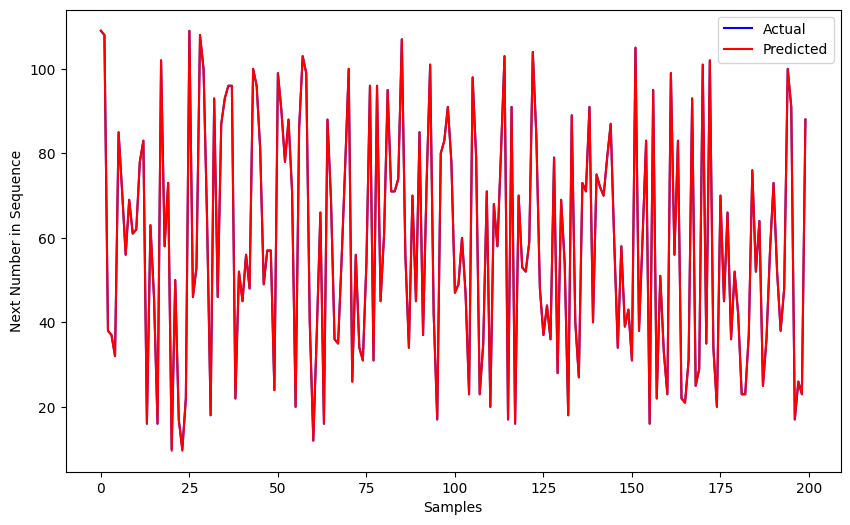

In [13]:
# Plot actual vs predicted
plt.figure(figsize=(10, 6))
plt.plot(y_test, label='Actual', color='blue')
plt.plot(y_pred, label='Predicted', color='red')
plt.xlabel('Samples')
plt.ylabel('Next Number in Sequence')
plt.legend()
plt.show()